In [8]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
import numpy as np
import os
from scipy.spatial.distance import cdist
import random

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Global variables

In [9]:
wdir="/martini/rubiz/Github/PsbS_Binding_Site"
dir3=f"{wdir}/3_reference_proteins"
dir4=f"{wdir}/4_pairs"
dir5=f"{wdir}/5_psii"

#---IMPORTANT FILES IN THIS SCRIPT
pdb0=f"{dir5}/base_dir/rotated.pdb" # CG PSII with cofactors and chains 


In [10]:
u0 = mda.Universe(pdb0) 
pos0 = u0.select_atoms("all").positions

# Load trajectories

In [11]:
# Load on-the-fly daft files
chains=["4", "s", "r", "c", "8", "S", "R", "C"]
rotations=20
seeds=(242, 484)

dict_daft = {}
for chain in chains:
    for rot in range(1, rotations + 1):
        for seed in seeds:
            rotation=f"{rot:04d}"
            dir=f"{dir5}/daft_initial/chain_{chain}"
            file=f"{dir}/chain_{chain}_seed{seed}_{rotation}.pdb"
            if os.path.exists(file):
                u = mda.Universe(file)
                dict_daft[f"chain_{chain}_seed{seed}_{rotation}"] = u
            else:
                print(f"File {file} does not exist!")
                break


# Segment the structures into groups

In [12]:
# add coordinates to the daft files
for key, u in dict_daft.items():
    coordinates = u.select_atoms("not chainID A B").positions
    dict_daft[key].positions_chain = coordinates
    coordinates = u.select_atoms("chainID A B").positions
    dict_daft[key].positions_psbs = coordinates
    center_of_mass = u.select_atoms("not chainID A B").center_of_mass()
    dict_daft[key].center_of_mass_chain = center_of_mass
    center_of_mass = u.select_atoms("chainID A B").center_of_mass()
    dict_daft[key].center_of_mass_psbs = center_of_mass

# Figure to illustrate DAFT simulations

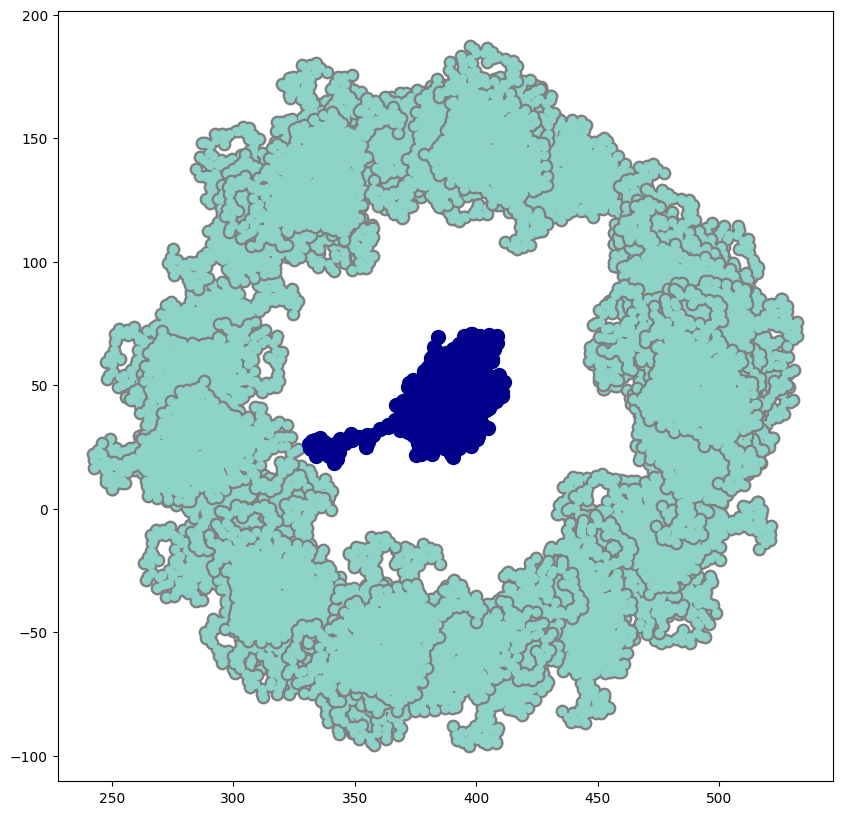

In [13]:


#Plot the coordinates
fig, ax = plt.subplots(figsize=(10, 10))
#ax.scatter(u0.atoms.positions[:, 0], u0.atoms.positions[:, 1], color='grey')

#chains = ["4", "s", "r", "c"]
chains = ["4"]
cmap= plt.get_cmap("Set3")
color0 = cmap(0)   # first color

for i in range(len(chains)):
    chain = chains[i]
    for rot in range(1, rotations + 1):
        for seed in seeds:
            key = f"chain_{chain}_seed{seed}_{rot:04d}"
            if key in dict_daft:
                                
                # Create a unique identifier for this configuration, exluce the first color
                
                config_id = rot * len(seeds) + list(seeds).index(seed)
                total_configs = rotations * len(seeds)
                
                # Use a colormap to get colors
                cmap = plt.colormaps['Set3']
                config_color = cmap(config_id / total_configs) 
                positions = dict_daft[key].positions_psbs
                ax.scatter(positions[:, 0], positions[:, 1], color='grey', alpha=1,s=80)
                ax.scatter(positions[:, 0], positions[:, 1], color=color0, alpha=1,s=30)

# Plot PsbS
positions_chain = dict_daft[f"chain_{chains[0]}_seed{seeds[0]}_0001"].positions_chain

ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color='darkblue', alpha=1, s=100, label='PsbS')



# All coordinates

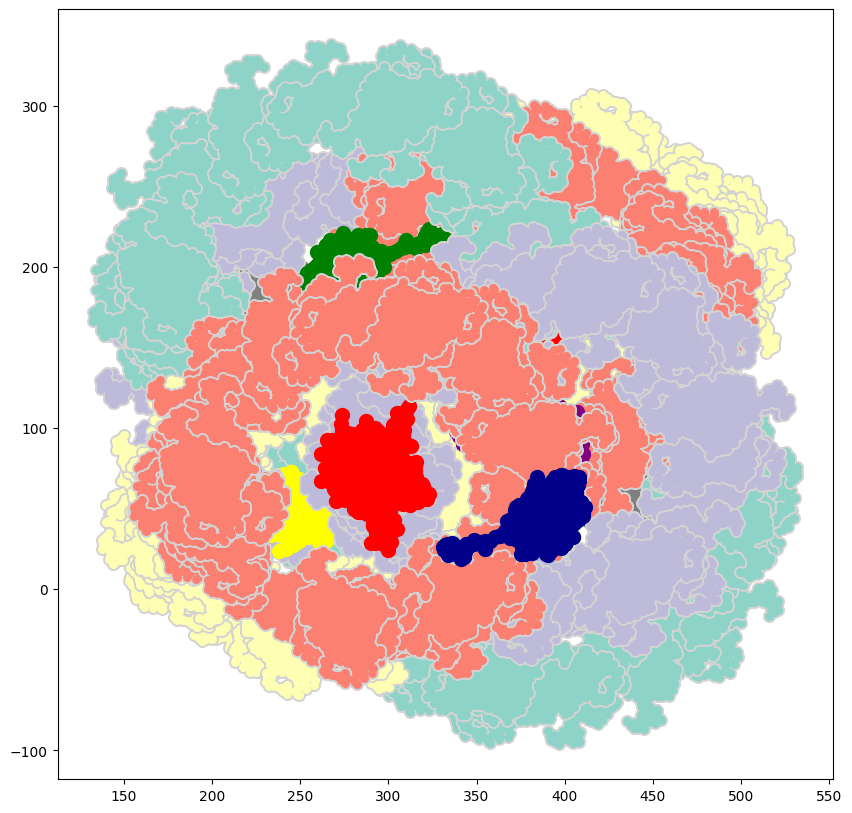

In [14]:
#Plot the coordinates
fig, ax = plt.subplots(figsize=(10, 10))
#ax.scatter(u0.atoms.positions[:, 0], u0.atoms.positions[:, 1], color='grey')
pallette = plt.colormaps['Set3']
#chains = ["4","s","r"]
chains = ["4", "s", "r", "c", "8", "S", "R", "C"]
x_limits = [0,500]
y_limits = [0,500]
cmap= plt.get_cmap("Set3")
colors = [cmap(0), cmap(1), cmap(2), cmap(3), cmap(0), cmap(1), cmap(2), cmap(3)]

dark_colors = ["green", "yellow","purple","red", "green", "yellow","purple","red"]
ax.scatter(u0.atoms.positions[:, 0], u0.atoms.positions[:, 1], color='grey', alpha=1, s=80)
for i in range(len(chains)):
    chain = chains[i]
    color = colors[i]
    dark_color = dark_colors[i]
    positions_chain = dict_daft[f"chain_{chain}_seed{seeds[0]}_0001"].positions_chain
    ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color=dark_color, alpha=1, s=100, label='PsbS')
    for rot in range(1, rotations + 1):
        for seed in seeds:
            key = f"chain_{chain}_seed{seed}_{rot:04d}"
            if key in dict_daft:
                                
                # Create a unique identifier for this configuration, exluce the first color
             
                positions = dict_daft[key].positions_psbs
                ax.scatter(positions[:, 0], positions[:, 1], color="lightgrey", alpha=1,s=70)
                ax.scatter(positions[:, 0], positions[:, 1], color=color, alpha=1,s=30)

#ax.set_xlim(x_limits)
#ax.set_ylim(y_limits)

# Plot PsbS
positions_chain = dict_daft[f"chain_{chains[0]}_seed{seeds[0]}_0001"].positions_chain

ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color='darkblue', alpha=1, s=100, label='PsbS')

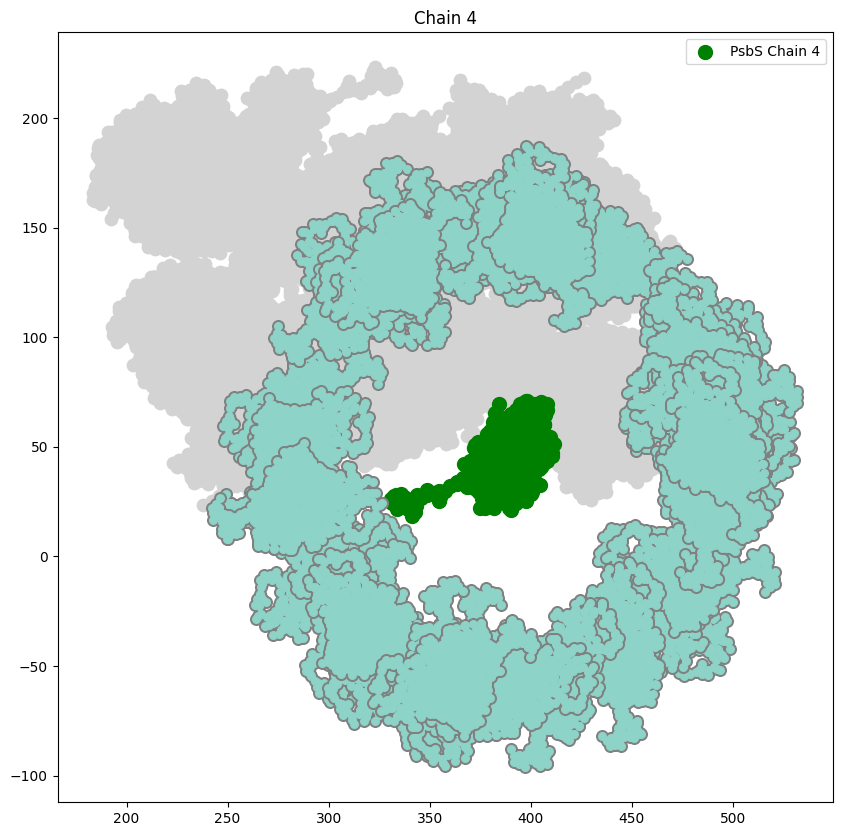

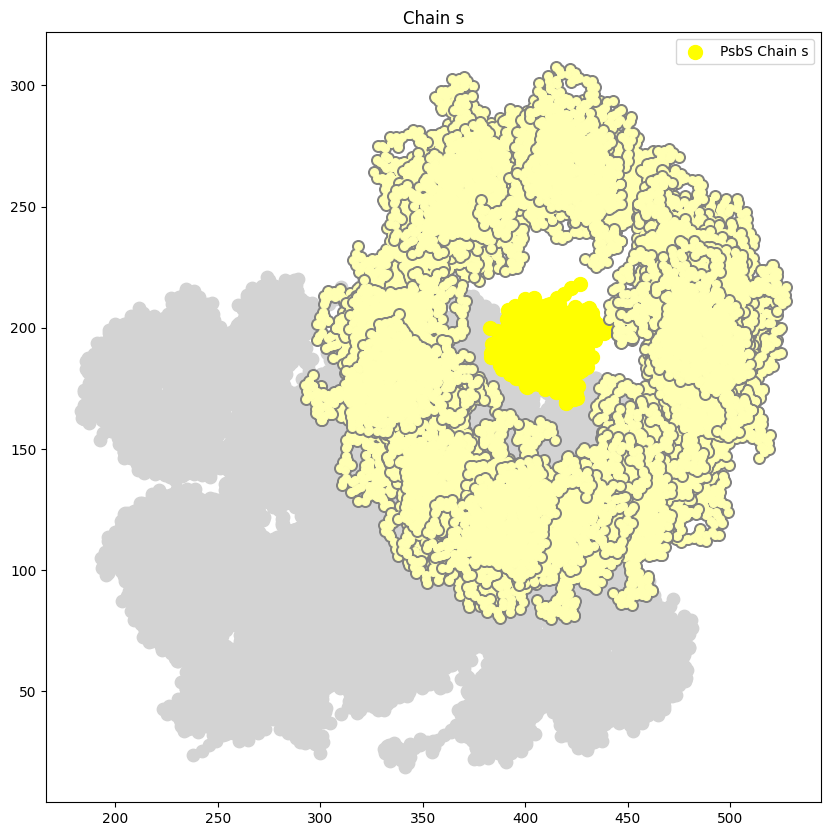

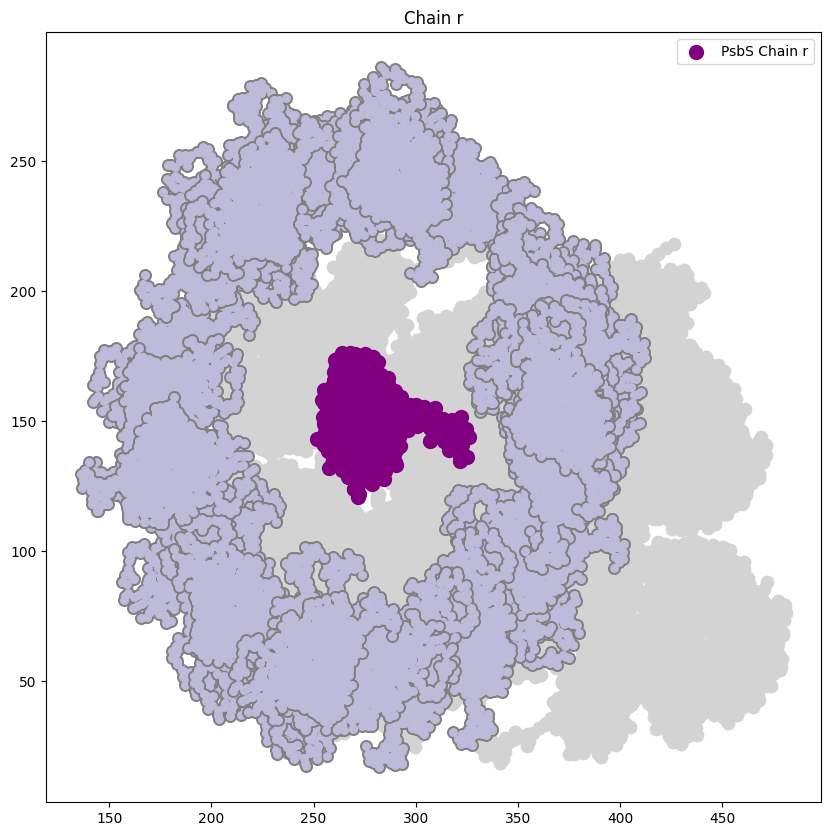

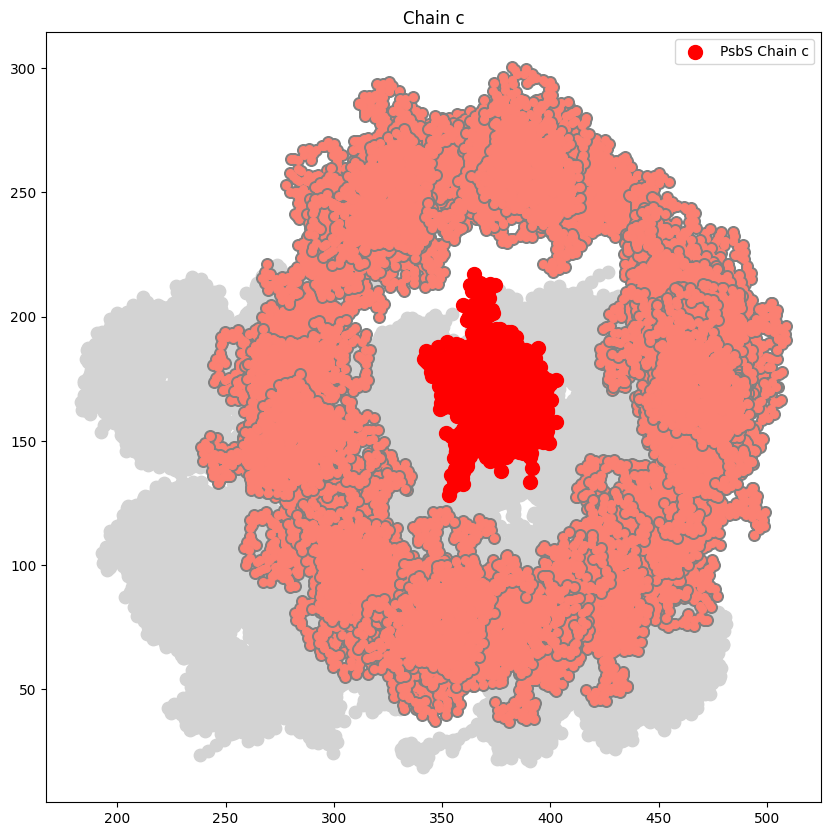

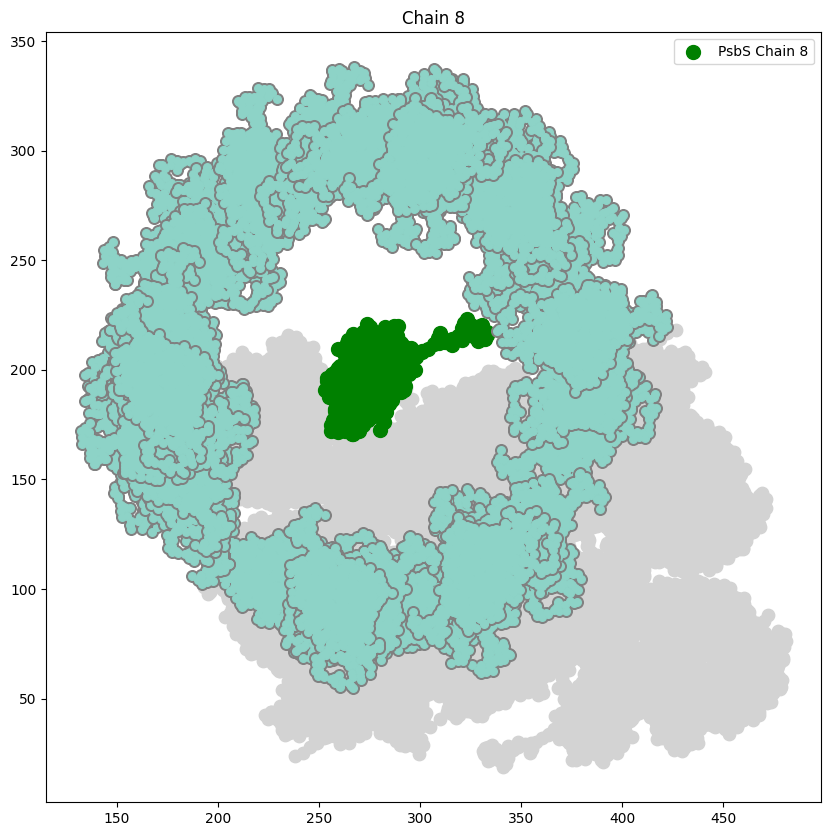

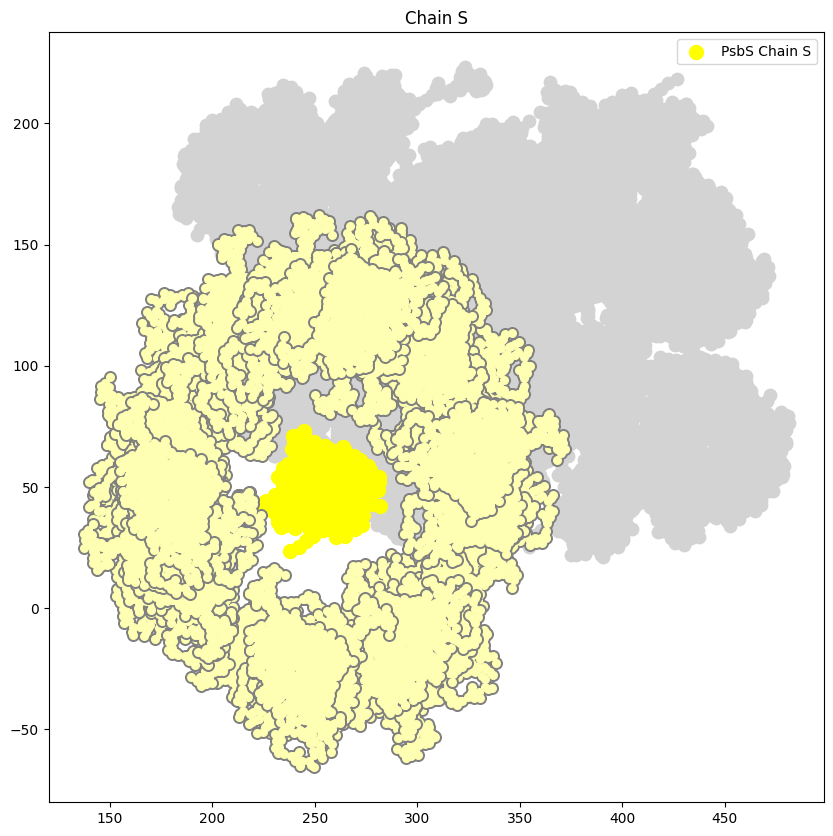

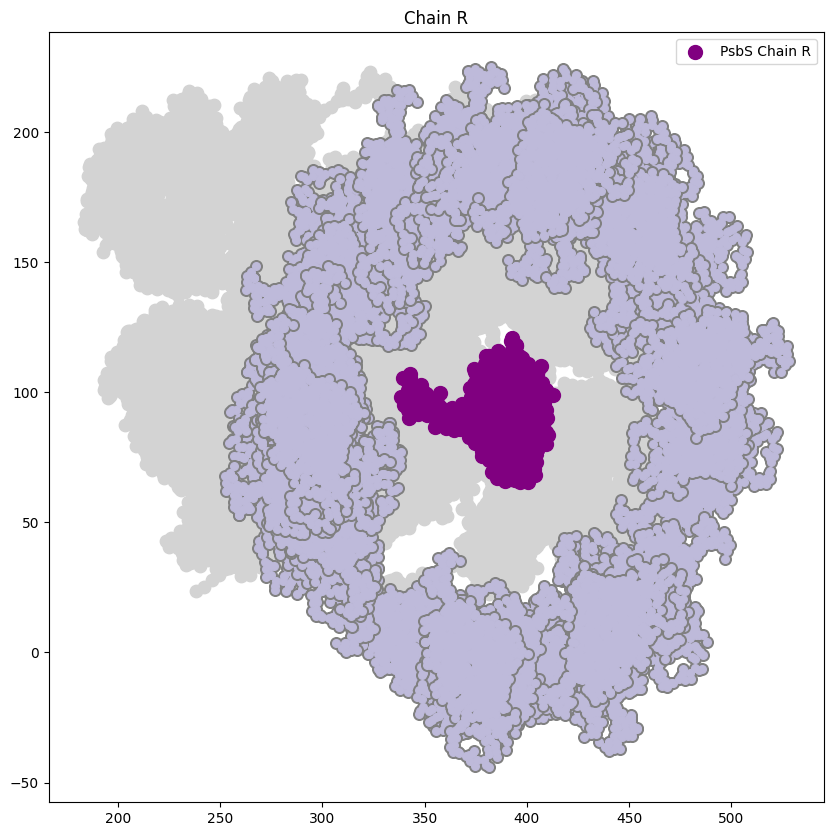

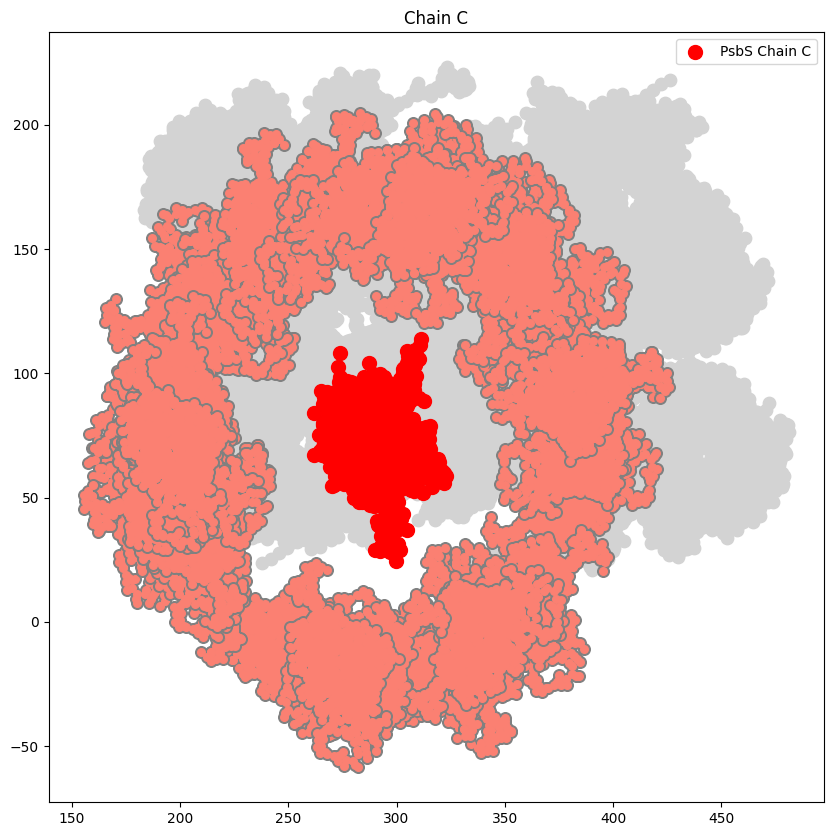

In [15]:
# Create separate figures for each chain
for i in range(len(chains)):
    chain = chains[i]
    color = colors[i]
    dark_color = dark_colors[i]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(u0.atoms.positions[:, 0], u0.atoms.positions[:, 1], color='lightgrey', alpha=1, s=80)
    x_limits = [-250,550]
    y_limits = [0,350]


    # Plot PsbS chain
    positions_chain = dict_daft[f"chain_{chain}_seed{seeds[0]}_0001"].positions_chain
    ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color=dark_color, alpha=1, s=100, label=f'PsbS Chain {chain}')
    
    # Plot all rotations and seeds for this chain
    for rot in range(1, rotations + 1):
        for seed in seeds:
            key = f"chain_{chain}_seed{seed}_{rot:04d}"
            if key in dict_daft:
                positions = dict_daft[key].positions_psbs
                ax.scatter(positions[:, 0], positions[:, 1], color="grey", alpha=1, s=70)
                ax.scatter(positions[:, 0], positions[:, 1], color=color, alpha=1, s=30)
    #ax.set_xlim(x_limits)
    #ax.set_ylim(y_limits)
    
    ax.legend()
    ax.set_title(f'Chain {chain}')
    plt.show()


In [16]:
threshold = 8  # Angstroms
for key, u in dict_daft.items():
    pos1 = dict_daft[key].positions_psbs
    distances = cdist(pos0, pos1)
    min_distance = np.min(distances)  # Closest approach
    dict_daft[key].intersects = min_distance < threshold

In [17]:
# Print how many configurations intersect with the PSII
intersecting_configs = [key for key, u in dict_daft.items() if u.intersects]
print(f"Number of configurations intersecting with PSII: {len(intersecting_configs)}")


Number of configurations intersecting with PSII: 242


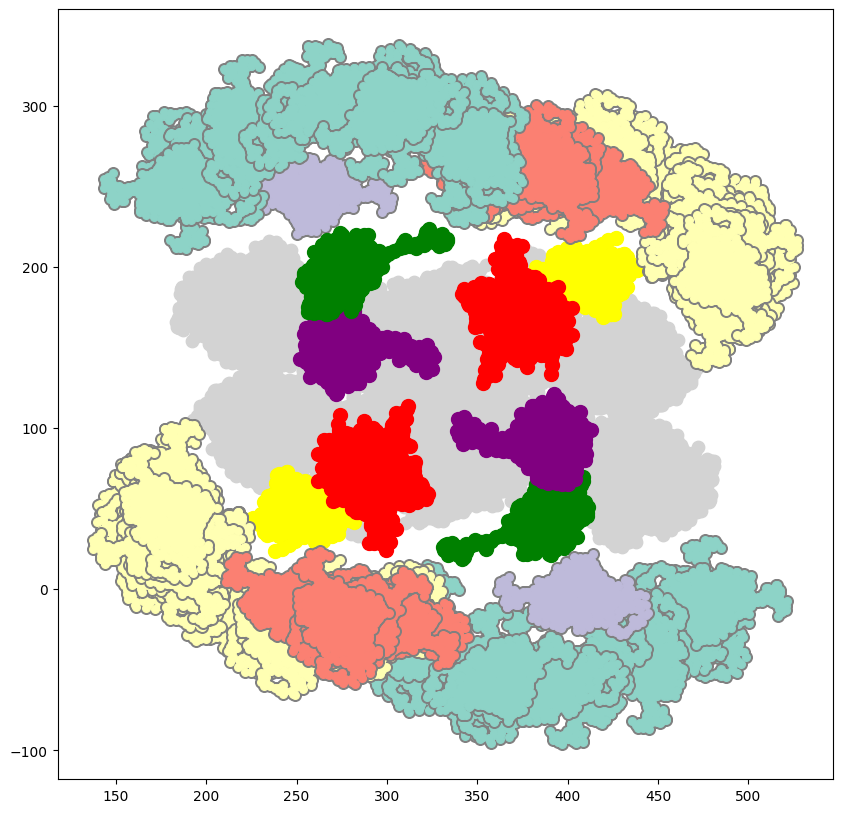

In [18]:
#Plot the coordinates
fig, ax = plt.subplots(figsize=(10, 10))
#ax.scatter(u0.atoms.positions[:, 0], u0.atoms.positions[:, 1], color='grey')
pallette = plt.colormaps['Set3']
#chains = ["4","s","r"]
chains = ["4", "s", "r", "c", "8", "S", "R", "C"]
x_limits = [-250,550]
y_limits = [0,350]

cmap= plt.get_cmap("Set3")
colors = [cmap(0), cmap(1), cmap(2), cmap(3), cmap(0), cmap(1), cmap(2), cmap(3)]

dark_colors = ["green", "yellow","purple","red", "green", "yellow","purple","red"]
ax.scatter(pos0[:, 0], pos0[:, 1], color='lightgrey', alpha=1, s=80)
for i in range(len(chains)):
    chain = chains[i]
    color = colors[i]
    dark_color = dark_colors[i]
    positions_chain = dict_daft[f"chain_{chain}_seed{seeds[0]}_0001"].positions_chain
    ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color=dark_color, alpha=1, s=100, label='PsbS')
    for rot in range(1, rotations + 1):
        for seed in seeds:
            key = f"chain_{chain}_seed{seed}_{rot:04d}"
            if key in dict_daft:
                                
                if dict_daft[key].intersects == False:
                    # Create a unique identifier for this configuration, exluce the first color
                    positions = dict_daft[key].positions_psbs
                    ax.scatter(positions[:, 0], positions[:, 1], color="grey", alpha=1,s=70)
                    ax.scatter(positions[:, 0], positions[:, 1], color=color, alpha=1,s=30)
#ax.set_xlim(x_limits)
#ax.set_ylim(y_limits)

# Plot PsbS
#positions_chain = dict_daft[f"chain_{chains[0]}_seed{seeds[0]}_0001"].positions_chain

#ax.scatter(positions_chain[:, 0], positions_chain[:, 1], color='darkblue', alpha=1, s=100, label='PsbS')

In [19]:
# Get bounds from NON-intersecting coordinates (the ones we want to bin)
non_intersecting_positions = []
for key in dict_daft:
    if not dict_daft[key].intersects:
        non_intersecting_positions.append(dict_daft[key].positions_psbs)

all_positions = np.concatenate(non_intersecting_positions)
x_min, x_max = np.min(all_positions[:, 0]), np.max(all_positions[:, 0])
y_min, y_max = np.min(all_positions[:, 1]), np.max(all_positions[:, 1])

# Create 8 regions (4x2 grid)
nx_bins = 4  # 4 columns
ny_bins = 2  # 2 rows
x_bins = np.linspace(x_min, x_max, nx_bins + 1)  # 5 edges for 4 bins
y_bins = np.linspace(y_min, y_max, ny_bins + 1)  # 3 edges for 2 bins

# Assign region IDs starting from 1
for key, u in dict_daft.items():
    if not dict_daft[key].intersects:
        center = np.mean(dict_daft[key].positions_psbs, axis=0)[:2]
        
        # Find which bin the center falls into
        x_idx = np.digitize(center[0], x_bins) - 1
        y_idx = np.digitize(center[1], y_bins) - 1
        
        # Clamp indices to valid range
        x_idx = max(0, min(x_idx, nx_bins - 1))  # 0, 1, 2, or 3
        y_idx = max(0, min(y_idx, ny_bins - 1))  # 0 or 1
        
        # Assign region ID starting from 1 (1-8 for 8 regions)
        dict_daft[key].region_id = y_idx * nx_bins + x_idx + 1
    else:
        dict_daft[key].region_id = None

unique_region_ids = set(u.region_id for u in dict_daft.values() if u.region_id is not None)
print(f"Unique region IDs: {unique_region_ids}")
print(f"Number of regions: {len(unique_region_ids)}")

Unique region IDs: {1, 2, 3, 4, 5, 6, 7, 8}
Number of regions: 8


Found 78 non-intersecting configurations
Regions: [1 2 3 4 5 6 7 8]


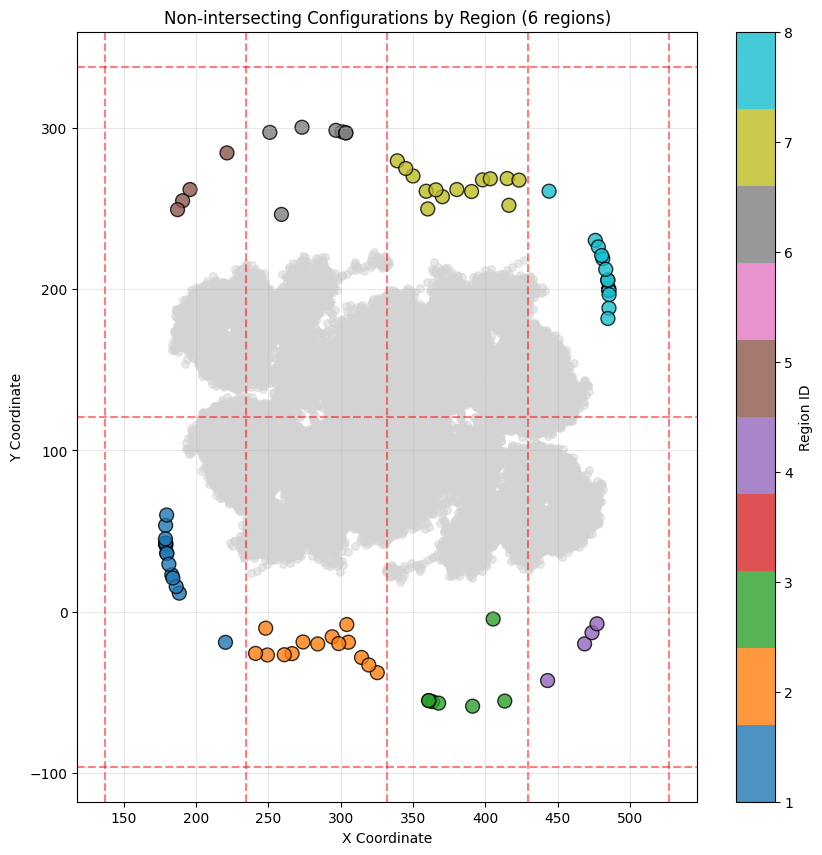

In [20]:
# Create new figure for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot PSII background
ax.scatter(pos0[:, 0], pos0[:, 1], color='lightgrey', alpha=0.5, s=30)

# Collect data for scatter plot with colorbar
centers = []
region_ids = []

for key, u in dict_daft.items():
    if hasattr(dict_daft[key], 'region_id') and dict_daft[key].region_id is not None:
        center = np.mean(dict_daft[key].positions_psbs, axis=0)[:2]
        centers.append(center)
        region_ids.append(dict_daft[key].region_id)

# Convert to numpy arrays
centers = np.array(centers)
region_ids = np.array(region_ids)

# Create scatter plot with colorbar
if len(centers) > 0:
    scatter = ax.scatter(centers[:, 0], centers[:, 1], c=region_ids, 
                        cmap='tab10', alpha=0.8, s=100, edgecolors='black')
    plt.colorbar(scatter, label='Region ID')
    
    # Add grid lines to show regions
    for x in x_bins:
        ax.axvline(x, color='red', linestyle='--', alpha=0.5)
    for y in y_bins:
        ax.axhline(y, color='red', linestyle='--', alpha=0.5)
    
    print(f"Found {len(centers)} non-intersecting configurations")
    print(f"Regions: {np.unique(region_ids)}")
else:
    print("No non-intersecting configurations found!")

# Show the plot
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Non-intersecting Configurations by Region (6 regions)')
ax.grid(True, alpha=0.3)
plt.show()


In [21]:
# Print the number of configurations per region
region_counts = {}
for key, u in dict_daft.items():
    if hasattr(dict_daft[key], 'region_id') and dict_daft[key].region_id is not None:
        region_id = dict_daft[key].region_id
        if region_id in region_counts:
            region_counts[region_id] += 1
        else:
            region_counts[region_id] = 1

# Print the number of configurations per region
print("Number of configurations per region:")
for region_id, count in region_counts.items():
    print(f"Region {region_id}: {count} configurations")

#region with the less configurations
min_region_id = min(region_counts, key=region_counts.get) if region_counts else None
print(f"Region with the least configurations: {min_region_id} with {region_counts.get(min_region_id, 0)} configurations")   

# Randomly select configurations from each region (limit to the count of the smallest region)
seed = 42
random.seed(seed)

filtered = {}
for region_id, count in region_counts.items():
    if count > 0:
        # Get all configurations in this region
        configs_in_region = [key for key, u in dict_daft.items() if hasattr(u, 'region_id') and u.region_id == region_id]
        if configs_in_region:
            # Select min_region_id number of configurations (or all if fewer available)
            #num_to_select = min(len(configs_in_region), region_counts.get(min_region_id, 0))
            selected_configs = random.sample(configs_in_region, k=min_region_id)
            for selected_config in selected_configs:
                filtered[selected_config] = dict_daft[selected_config]

# Create dictionary to group configurations by region
odd_regions_dict = {}
for key, u in filtered.items():
    if hasattr(u, 'region_id') and u.region_id is not None:
        region_id = u.region_id

        #Check if the region_id is odd
        if region_id % 2 == 1:
            if region_id not in odd_regions_dict:
                odd_regions_dict[region_id] = []
            odd_regions_dict[region_id].append(key)

even_regions_dict = {}
for key, u in filtered.items():
    if hasattr(u, 'region_id') and u.region_id is not None:
        region_id = u.region_id
        #Check if the region_id is even
        if region_id % 2 == 0:
            if region_id not in even_regions_dict:
                even_regions_dict[region_id] = []
            even_regions_dict[region_id].append(key)




Number of configurations per region:
Region 4: 4 configurations
Region 2: 14 configurations
Region 3: 7 configurations
Region 8: 14 configurations
Region 7: 14 configurations
Region 6: 7 configurations
Region 5: 4 configurations
Region 1: 14 configurations
Region with the least configurations: 4 with 4 configurations


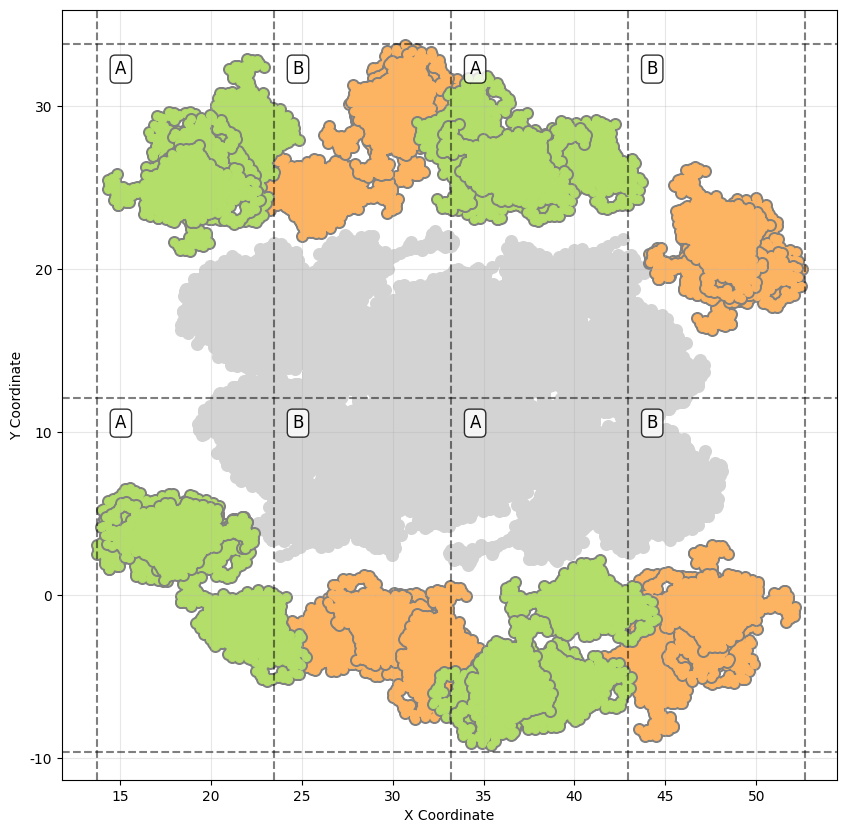

In [53]:
# Create new figure for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot PSII background
ax.scatter(pos0[:, 0], pos0[:, 1], color='lightgrey', alpha=1, s=70)

# Collect data for scatter plot with colorbar
centers = []
region_ids = []

# Plot filtered configurations
for region_id, config_keys in even_regions_dict.items():
    for key in config_keys:
        if hasattr(dict_daft[key], 'region_id') and dict_daft[key].region_id is not None:
            positions = dict_daft[key].positions_psbs
            ax.scatter(positions[:, 0], positions[:, 1], color="grey", alpha=1, s=70)
            ax.scatter(positions[:, 0], positions[:, 1], color=cmap(5), alpha=1, s=30)
            # Collect center and region_id for colorbar
            center = np.mean(positions, axis=0)[:2]
            centers.append(center)
            region_ids.append(dict_daft[key].region_id)

for region_id, config_keys in odd_regions_dict.items():
    for key in config_keys:
        if hasattr(dict_daft[key], 'region_id') and dict_daft[key].region_id is not None:
            positions = dict_daft[key].positions_psbs
            ax.scatter(positions[:, 0], positions[:, 1], color="grey", alpha=1, s=70)
            ax.scatter(positions[:, 0], positions[:, 1], color=cmap(6), alpha=1, s=30)
            # Collect center and region_id for colorbar
            center = np.mean(positions, axis=0)[:2]
            centers.append(center)
            region_ids.append(dict_daft[key].region_id)

# Convert to numpy arrays

# Add grid lines to show regions
for x in x_bins:
    ax.axvline(x, color='black', linestyle='--', alpha=0.5)
for y in y_bins:
    ax.axhline(y, color='black', linestyle='--', alpha=0.5)

labels = ["A", "B", "A", "B", "A", "B", "A", "B"]
# At the top-left of each region, add the region ID
for label, region_id in zip(labels, np.unique(region_ids)):
    # Calculate which bin this region corresponds to
    bin_x = (region_id - 1) % nx_bins  # Convert region_id back to x bin index
    bin_y = (region_id - 1) // nx_bins  # Convert region_id back to y bin index
    
    # Get the top-left corner coordinates
    x_left = x_bins[bin_x]
    y_top = y_bins[bin_y + 1] if bin_y + 1 < len(y_bins) else y_bins[bin_y]
    
    ax.text(x_left + 10, y_top - 10, label, color='black', fontsize=12, 
            ha='left', va='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
x_ticks = ax.get_xticks()
x_ticks_nm = [f"{x_tick / 10:.0f}" for x_tick in x_ticks]
ax.set_xticklabels(x_ticks_nm)
y_ticks = ax.get_yticks()
y_ticks_nm = [f"{y_tick / 10:.0f}" for y_tick in y_ticks]
ax.set_yticklabels(y_ticks_nm)

# Show the plot
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
#ax.set_title('Non-intersecting Configurations by Region (6 regions)')
ax.grid(True, alpha=0.3)
plt.show()


# Initial configurations

In [56]:
# Split the odd and even region in the number of configurations
dict_split = {}
keys1 = list(even_regions_dict.values())
keys2 = list(odd_regions_dict.keys())
u1 = []
u2 = []
for i in range(min_region_id):
    region = i+1
    values1 = list({k: v[i] for k, v in odd_regions_dict.items()}.values()) # n element of each key
    values2 = list({k: v[i] for k, v in even_regions_dict.items()}.values()) # n element of each key
    group1 = [u0.select_atoms("all")] # Add PSII
    group2 = [u0.select_atoms("all")]
    for j in range(len(values1)):
        selection = dict_daft[values1[j]].select_atoms("chainID A B").copy()
        group1.append(selection)
        selection = dict_daft[values2[j]].select_atoms("chainID A B").copy()
        group2.append(selection)
    u1.append(group1)
    u2.append(group2)

    
 



In [57]:
for i in range(len(u1)):
    universe1 =  mda.Merge(*u1[i])
    universe2 =  mda.Merge(*u2[i])#
    filename1 = f"{dir5}/psii_psbs/initial_structures/sim1_{i+1}.pdb"
    filename2 = f"{dir5}/psii_psbs/initial_structures/sim2_{i+1}.pdb"

    universe1.atoms.write(filename1)
    universe2.atoms.write(filename2)

In [58]:
dict_merged1 = {}
dict_merged2 = {}

for i in range(len(u1)):
    filename1 = f"{dir5}/psii_psbs/initial_structures/sim1_{i+1}.pdb"
    filename2 = f"{dir5}/psii_psbs/initial_structures/sim2_{i+1}.pdb"
    dict_merged1[filename1] = mda.Universe(filename1)
    dict_merged2[filename2] = mda.Universe(filename2)



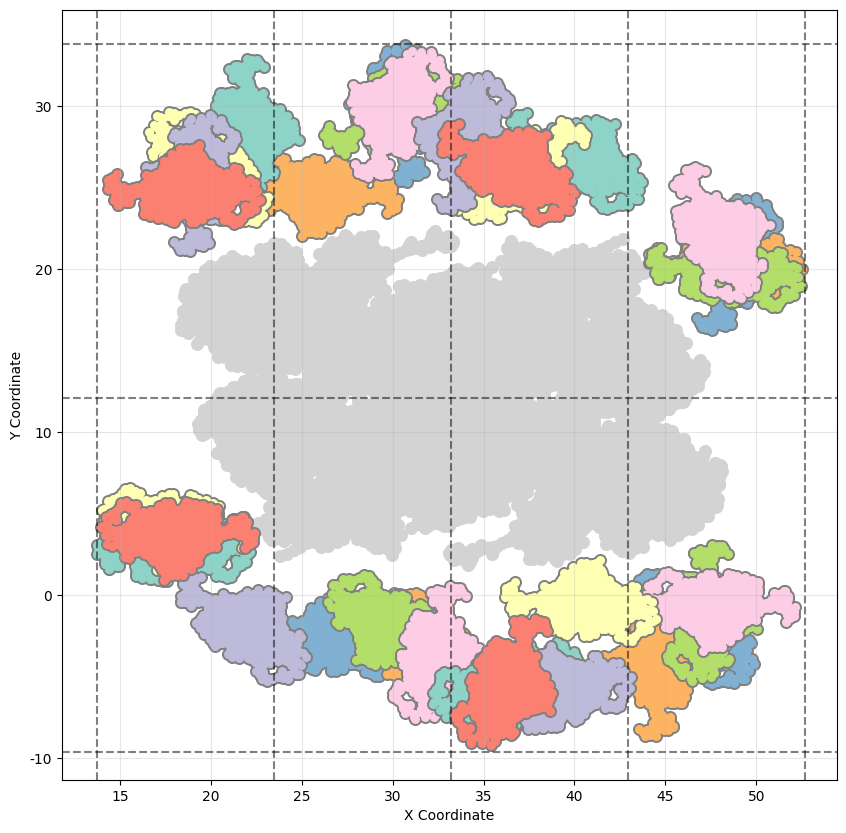

In [59]:
# Create new figure for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot PSII background
ax.scatter(pos0[:, 0], pos0[:, 1], color='lightgrey', alpha=1, s=70)

# Collect data for scatter plot with colorbar
# Collect data for scatter plot with colorbar
centers = []
region_ids = []

# Get first 4 colors for dict_merged1 and next 4 for dict_merged2
colors1 = [cmap(i) for i in range(4)]       # First 4 colors: 0, 1, 2, 3
colors2 = [cmap(i) for i in range(4, 8)]    # Next 4 colors: 4, 5, 6, 7

# Plot the universes from dict_merged2
for i, (key, u) in enumerate(dict_merged2.items()):
    positions = u.select_atoms("chainID A B and not id 0:32588").positions  # Only chainID A
    ax.scatter(positions[:, 0], positions[:, 1], color="grey", alpha=1, s=70)
    color_idx = i % len(colors2)  # Cycle through colors2
    ax.scatter(positions[:, 0], positions[:, 1], color=colors2[color_idx], alpha=1, s=30)
    
    # Collect center and region_id for colorbar
    center = np.mean(positions, axis=0)[:2]
    centers.append(center)
    region_ids.append(int(key.split('_')[-1].split('.')[0]))  # Extract region ID from filename

# Plot the universes from dict_merged1
for i, (key, u) in enumerate(dict_merged1.items()):
   positions = u.select_atoms("chainID A B and not id 0:32588").positions
   ax.scatter(positions[:, 0], positions[:, 1], color="grey", alpha=1, s=70)
   color_idx = i % len(colors1)  # Cycle through colors1
   ax.scatter(positions[:, 0], positions[:, 1], color=colors1[color_idx], alpha=1, s=30)
   
   # Collect center and region_id for colorbar
   center = np.mean(positions, axis=0)[:2]
   centers.append(center)
   region_ids.append(int(key.split('_')[-1].split('.')[0]))  # Extract region ID from filename

# Add grid lines to show regions
for x in x_bins:
    ax.axvline(x, color='black', linestyle='--', alpha=0.5)
for y in y_bins:
    ax.axhline(y, color='black', linestyle='--', alpha=0.5)

#labels = ["A", "B", "A", "B", "A", "B", "A", "B"]
## At the top-left of each region, add the region ID for all 8 regions
#all_region_ids = list(range(1, 9))  # [1, 2, 3, 4, 5, 6, 7, 8]
#for label, region_id in zip(labels, all_region_ids):
#    # Calculate which bin this region corresponds to
#    bin_x = (region_id - 1) % nx_bins  # Convert region_id back to x bin index
#    bin_y = (region_id - 1) // nx_bins  # Convert region_id back to y bin index
#    
#    # Get the top-left corner coordinates
#    x_left = x_bins[bin_x]
#    y_top = y_bins[bin_y + 1] if bin_y + 1 < len(y_bins) else y_bins[bin_y]
#    
#    ax.text(x_left + 10, y_top - 10, label, color='black', fontsize=12, 
#            ha='left', va='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Show the plot
# Convert the x axis to nanometers
x_ticks = ax.get_xticks()
x_ticks_nm = [f"{x_tick / 10:.0f}" for x_tick in x_ticks]
ax.set_xticklabels(x_ticks_nm)
y_ticks = ax.get_yticks()
y_ticks_nm = [f"{y_tick / 10:.0f}" for y_tick in y_ticks]
ax.set_yticklabels(y_ticks_nm)

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
#ax.set_title('All tested configurations, grouped by simulation box')
ax.grid(True, alpha=0.3)
plt.show()